<center><h1> ADMN5016 Applied Artificial Intelligence and Machine Learning</h1>
<h2> Final Project: Linear Regression Model to Predict Diamond Prices
<h3> Eyas Abu Elhouf & Katrina Ong

---

## 1. Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Options for display
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.4f}'.format
sns.set_style("whitegrid")
sns.set_context("paper", font_scale = 2)


%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LassoCV, RidgeCV

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

---

## 2. Load and Explore Dataset

In [3]:
df = pd.read_csv("Diamonds Prices2022.csv")

In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.2300,Ideal,E,SI2,61.5000,55.0000,326,3.9500,3.9800,2.4300
1,2,0.2100,Premium,E,SI1,59.8000,61.0000,326,3.8900,3.8400,2.3100
2,3,0.2300,Good,E,VS1,56.9000,65.0000,327,4.0500,4.0700,2.3100
3,4,0.2900,Premium,I,VS2,62.4000,58.0000,334,4.2000,4.2300,2.6300
4,5,0.3100,Good,J,SI2,63.3000,58.0000,335,4.3400,4.3500,2.7500


In [5]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53938,53939,0.8600,Premium,H,SI2,61.0000,58.0000,2757,6.1500,6.1200,3.7400
53939,53940,0.7500,Ideal,D,SI2,62.2000,55.0000,2757,5.8300,5.8700,3.6400
53940,53941,0.7100,Premium,E,SI1,60.5000,55.0000,2756,5.7900,5.7400,3.4900
53941,53942,0.7100,Premium,F,SI1,59.8000,62.0000,2756,5.7400,5.7300,3.4300
53942,53943,0.7000,Very Good,E,VS2,60.5000,59.0000,2757,5.7100,5.7600,3.4700


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [7]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53943.0000,53943.0000,53943.0000,53943.0000,53943.0000,53943.0000,53943.0000,53943.0000
mean,26972.0000,0.7979,61.7493,57.4573,3932.7343,5.7312,5.7345,3.5387
std,15572.1471,0.4740,1.4326,2.2345,3989.3384,1.1217,1.1421,0.7057
min,1.0000,0.2000,43.0000,43.0000,326.0000,0.0000,0.0000,0.0000
25%,13486.5000,0.4000,61.0000,56.0000,950.0000,4.7100,4.7200,2.9100
50%,26972.0000,0.7000,61.8000,57.0000,2401.0000,5.7000,5.7100,3.5300
75%,40457.5000,1.0400,62.5000,59.0000,5324.0000,6.5400,6.5400,4.0400
max,53943.0000,5.0100,79.0000,95.0000,18823.0000,10.7400,58.9000,31.8000


In [8]:
df.drop("Unnamed: 0", axis= 1, inplace= True)

In [9]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.2300,Ideal,E,SI2,61.5000,55.0000,326,3.9500,3.9800,2.4300
1,0.2100,Premium,E,SI1,59.8000,61.0000,326,3.8900,3.8400,2.3100
2,0.2300,Good,E,VS1,56.9000,65.0000,327,4.0500,4.0700,2.3100
3,0.2900,Premium,I,VS2,62.4000,58.0000,334,4.2000,4.2300,2.6300
4,0.3100,Good,J,SI2,63.3000,58.0000,335,4.3400,4.3500,2.7500


In [10]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [11]:
len(df)

53943

In [12]:
df.duplicated().sum()

149

In [13]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [14]:
len(df)

53794

In [15]:
df.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

In [16]:
df.cut.value_counts()

Ideal        21488
Premium      13748
Very Good    12069
Good          4891
Fair          1598
Name: cut, dtype: int64

In [17]:
df.color.value_counts()

G    11262
E     9776
F     9520
H     8272
D     6755
I     5407
J     2802
Name: color, dtype: int64

In [18]:
df.clarity.value_counts()

SI1     13032
VS2     12229
SI2      9150
VS1      8156
VVS2     5056
VVS1     3647
IF       1784
I1        740
Name: clarity, dtype: int64

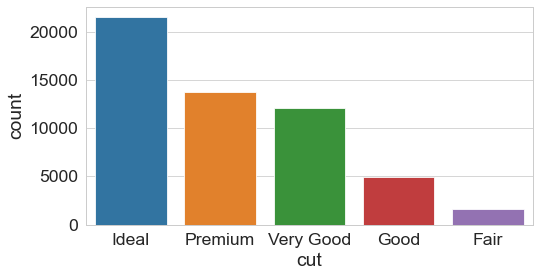

In [19]:
plt.figure(figsize=(8,4))
sns.countplot(x='cut',data=df, order= df.cut.value_counts().index);

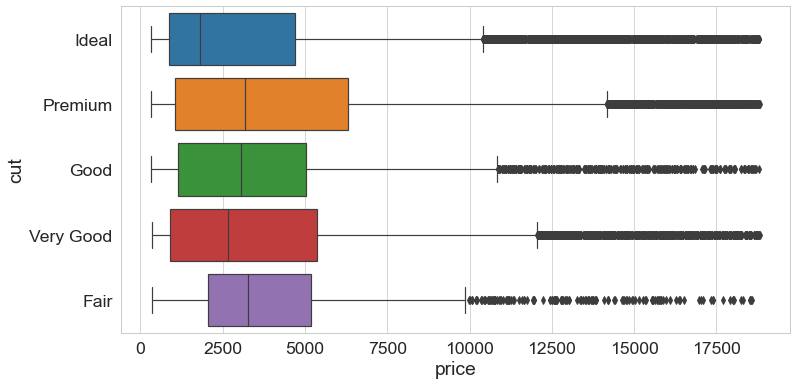

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="price", y="cut");

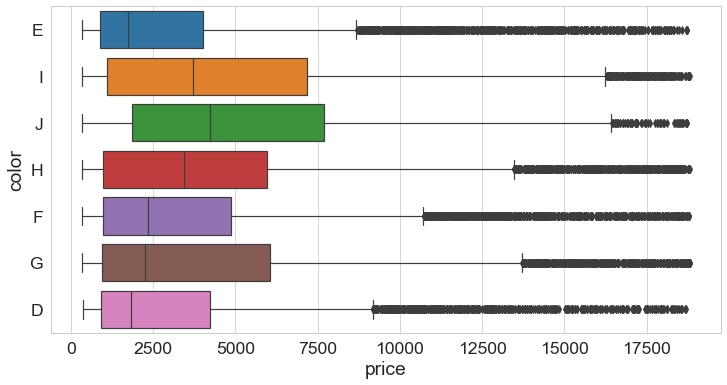

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="price", y="color");

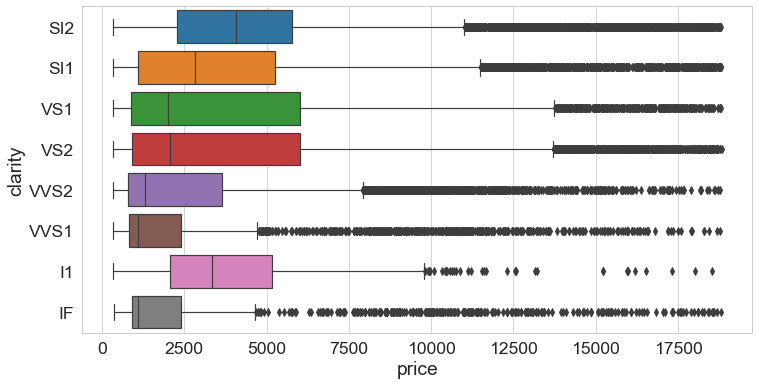

In [22]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="price", y="clarity");

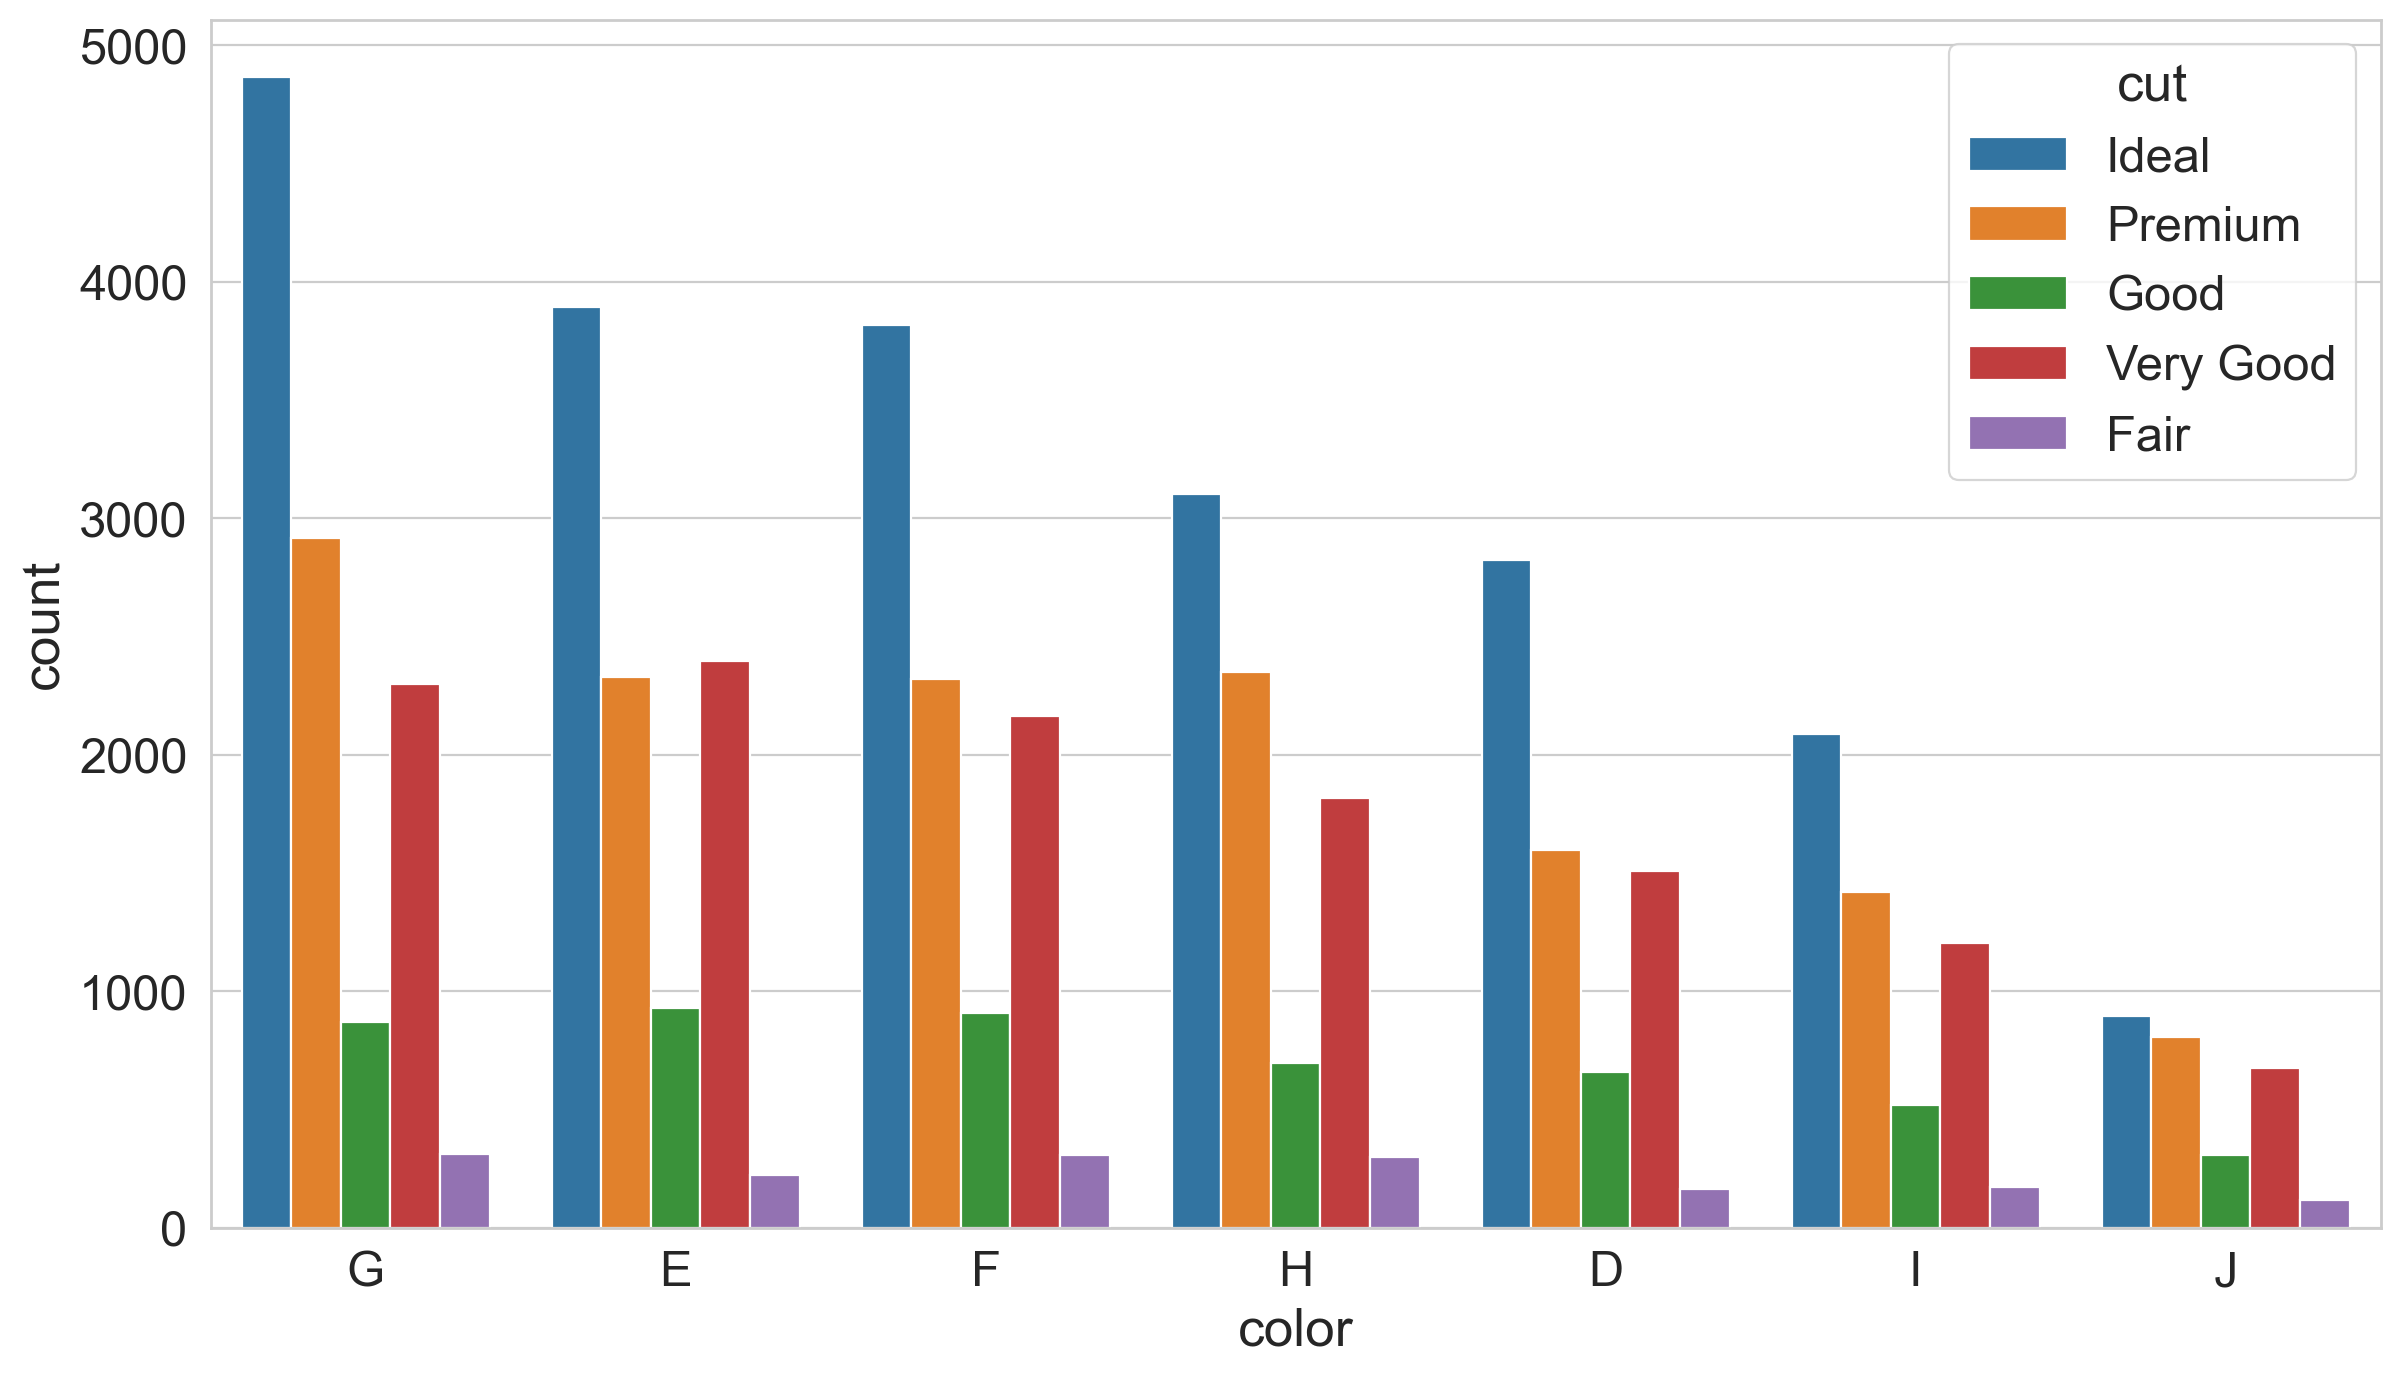

In [23]:
plt.figure(figsize=(14,8),dpi=200)
sns.countplot(x='color',data=df,hue='cut' ,order= df.color.value_counts().index);

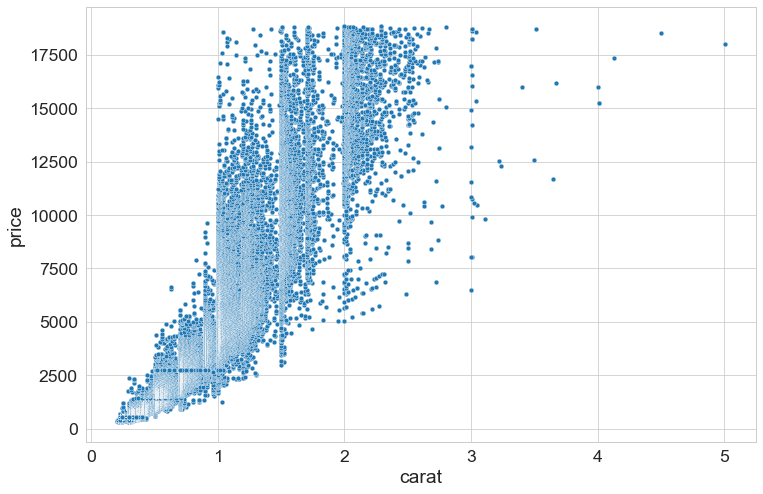

In [24]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x= 'carat', y = 'price');

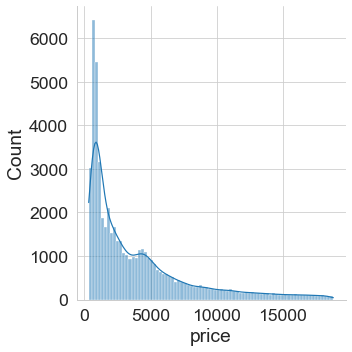

In [25]:
sns.displot(data=df,x='price',kde=True);

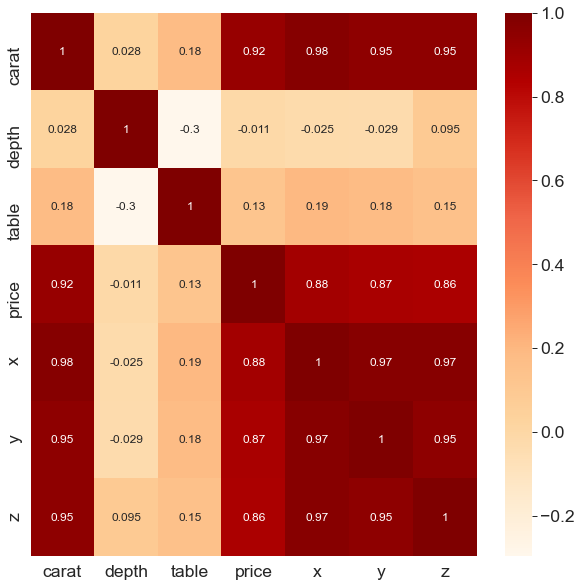

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True, annot_kws={"fontsize":12}, cmap='OrRd');
# x, y, z are highly correlated

In [27]:
#df.drop(['y', 'z'], axis=1, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.2300,Ideal,E,SI2,61.5000,55.0000,326,3.9500,3.9800,2.4300
1,0.2100,Premium,E,SI1,59.8000,61.0000,326,3.8900,3.8400,2.3100
2,0.2300,Good,E,VS1,56.9000,65.0000,327,4.0500,4.0700,2.3100
3,0.2900,Premium,I,VS2,62.4000,58.0000,334,4.2000,4.2300,2.6300
4,0.3100,Good,J,SI2,63.3000,58.0000,335,4.3400,4.3500,2.7500


In [28]:
catEnc = {"cut": {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5, },
         "clarity": {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}}

df = df.replace(catEnc)

In [29]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.2300,5,E,2,61.5000,55.0000,326,3.9500,3.9800,2.4300
1,0.2100,4,E,3,59.8000,61.0000,326,3.8900,3.8400,2.3100
2,0.2300,2,E,5,56.9000,65.0000,327,4.0500,4.0700,2.3100
3,0.2900,4,I,4,62.4000,58.0000,334,4.2000,4.2300,2.6300
4,0.3100,2,J,2,63.3000,58.0000,335,4.3400,4.3500,2.7500


In [30]:
df.dtypes

carat      float64
cut          int64
color       object
clarity      int64
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [31]:
df.cut.value_counts()

5    21488
4    13748
3    12069
2     4891
1     1598
Name: cut, dtype: int64

In [32]:
df.clarity.value_counts()

3    13032
4    12229
2     9150
5     8156
6     5056
7     3647
8     1784
1      740
Name: clarity, dtype: int64

---

## 3. Data Pre-processing

In [33]:
# split the data
X = df.drop('price',axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40345, 9), (13449, 9), (40345,), (13449,))

In [35]:
X_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [36]:
columns_to_encode = ['color']
columns_to_scale  = ['carat', 'cut', 'clarity', 'depth', 'table', 'x']


scaler = StandardScaler()
encoder = OneHotEncoder(categories='auto',
                       drop='first', 
                       sparse=False,
                       handle_unknown='error') 

# Fit and transform X_train columns
X_train_scaled_columns  = scaler.fit_transform(X_train[columns_to_scale]) 
X_train_encoded_columns = encoder.fit_transform(X_train[columns_to_encode])

# Transform X_test columns
X_test_scaled_columns = scaler.transform(X_test[columns_to_scale])
X_test_encoded_columns = encoder.transform(X_test[columns_to_encode])

# Concatenate X_train columns
X_train_se = np.concatenate([X_train_scaled_columns, X_train_encoded_columns], axis=1)

# Concatenate X_test columns
X_test_se = np.concatenate([X_test_scaled_columns, X_test_encoded_columns], axis=1)

In [37]:
X_train_se.shape, X_test_se.shape

((40345, 12), (13449, 12))

---

## 4. Linear Regression Model

In [38]:
# Fit a linear model
linear_model = LinearRegression()
linear_model.fit(X_train_se,y_train)

LinearRegression()

In [39]:
# Test the model
y_pred = linear_model.predict(X_test_se)

In [40]:
y_pred

array([8435.91199971, -637.63151956, 9966.07975459, ..., 2239.47805868,
       8621.69894779, 5344.47717772])

In [41]:
#Defining a Function to get key metrics
def get_metrics(y_testdata,y_predicteddata):
    MAE = round(mean_absolute_error(y_testdata,y_predicteddata),4)
    MSE = round(mean_squared_error(y_testdata,y_predicteddata),4)
    RMSE = round(np.sqrt(MSE),4)
    R2 = round(r2_score(y_testdata,y_predicteddata),4)
    
    print(f'Mean absolute error = {MAE}')
    print(f'Mean squared error = {MSE}')
    print(f'Root mean squared error = {RMSE}')
    print(f'R Squared = {R2}')
    
    return MAE, MSE, RMSE, R2

In [42]:
linearmodel_metrics = get_metrics(y_test,y_pred)

Mean absolute error = 777.2979
Mean squared error = 1448617.7023
Root mean squared error = 1203.5854
R Squared = 0.9086


---

## 5. Ridge Regression Model

In [43]:
# Fit a Ridge model
ridge_cv_model = RidgeCV(alphas=(0.1,0.2,0.5,1, 5,10),scoring='neg_mean_absolute_error')
ridge_cv_model.fit(X_train_se,y_train)

RidgeCV(alphas=(0.1, 0.2, 0.5, 1, 5, 10), scoring='neg_mean_absolute_error')

In [44]:
ridge_cv_model.alpha_

0.1

In [45]:
y_pred = ridge_cv_model.predict(X_test_se)

In [46]:
ridgecv_metrics = get_metrics(y_test,y_pred)

Mean absolute error = 777.3053
Mean squared error = 1448611.1967
Root mean squared error = 1203.5827
R Squared = 0.9086


---

## 6. Lasso Model

In [47]:
# Fit a Lasso model
lasso_cv_model = LassoCV(cv=5, random_state=42)
lasso_cv_model.fit(X_train_se, y_train)

LassoCV(cv=5, random_state=42)

In [48]:
lasso_cv_model.alpha_

3.6782514233554853

In [49]:
y_pred = lasso_cv_model.predict(X_test_se)

In [50]:
lassocv_metrics = get_metrics(y_test,y_pred)

Mean absolute error = 781.4562
Mean squared error = 1451741.0259
Root mean squared error = 1204.8822
R Squared = 0.9084


---

## 7. SGD Model

In [51]:
# Fit a SGD model
sgd_model = SGDRegressor(random_state=42)
sgd_model.fit(X_train_se, y_train)

SGDRegressor(random_state=42)

In [52]:
y_pred = sgd_model.predict(X_test_se)

In [53]:
sgd_metrics = get_metrics(y_test,y_pred)

Mean absolute error = 774.075
Mean squared error = 1451328.6131
Root mean squared error = 1204.711
R Squared = 0.9085


---

## 8. Random Forest Model

In [54]:
# Fit a RF model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_se, y_train)

RandomForestRegressor(random_state=42)

In [55]:
y_pred = rf_model.predict(X_test_se)

In [56]:
rfmodel_metrics = get_metrics(y_test,y_pred)

Mean absolute error = 292.5895
Mean squared error = 319669.8827
Root mean squared error = 565.3936
R Squared = 0.9798


---

## 9. Adaboost Model

In [57]:
ada_model = AdaBoostRegressor(random_state=42, n_estimators=100)
ada_model.fit(X_train_se, y_train)

AdaBoostRegressor(n_estimators=100, random_state=42)

In [58]:
y_pred = ada_model.predict(X_test_se)

In [59]:
ada_model_metrics = get_metrics(y_test,y_pred)

Mean absolute error = 910.0371
Mean squared error = 1565719.5023
Root mean squared error = 1251.2871
R Squared = 0.9013


---

## 10. Model Selection

In [60]:
#Create Dataframe for Performance Metrics of ALl Models
metric_labels = ("Mean Absolute Error", "Mean Squared Error","Root Mean Squared Error", "R Squared")
class_models = ("Linear Regression","Ridge Regression","Lasso Regression", "Stochastic Gradient Descent","Random Forest Regressor", "Adaboost")
metrics = (linearmodel_metrics, ridgecv_metrics, lassocv_metrics, sgd_metrics, rfmodel_metrics, ada_model_metrics)

df_modelperf = pd.DataFrame(index = metric_labels)

In [61]:
m = 0
for i in class_models:
    df_modelperf[i] = metrics[m]
    m += 1
    if m > len(metrics) - 1:
        break

In [62]:
df_modelperf.T 

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R Squared
Linear Regression,777.2979,1448617.7023,1203.5854,0.9086
Ridge Regression,777.3053,1448611.1967,1203.5827,0.9086
Lasso Regression,781.4562,1451741.0259,1204.8822,0.9084
Stochastic Gradient Descent,774.0750,1451328.6131,1204.7110,0.9085
Random Forest Regressor,292.5895,319669.8827,565.3936,0.9798
Adaboost,910.0371,1565719.5023,1251.2871,0.9013


---

## 11. Hyperparameter Tuning 

### Random Forest

In [63]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [64]:
parameters = {'max_features':[2, 5, 7], 'n_estimators':[50, 100, 150], 'min_samples_split':[2, 3, 4, 5]}
rf_search = GridSearchCV(rf_model, parameters, scoring='neg_mean_squared_error', cv=5)
rf_search.fit(X_train_se, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_features': [2, 5, 7],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [65]:
rf_search.best_params_

{'max_features': 7, 'min_samples_split': 5, 'n_estimators': 150}

In [66]:
y_pred = rf_search.predict(X_test_se)

In [67]:
rf_search_metrics = get_metrics(y_test,y_pred)

Mean absolute error = 287.8616
Mean squared error = 315223.4624
Root mean squared error = 561.4476
R Squared = 0.9801


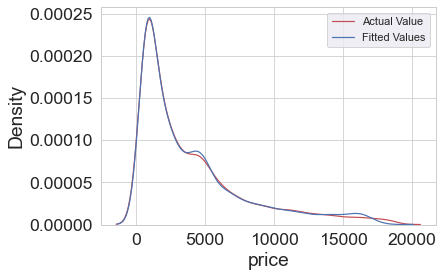

In [68]:
#distribution plot
ax1 = sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(y_pred, color="b", label="Fitted Values" , ax=ax1)
sns.set(rc={"figure.figsize":(6, 4)})
plt.legend()
plt.show();

---